In [1]:
#Import all the necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#Using pandas read the data into the notebook

df = pd.read_csv('/Users/mehakagrawal/Desktop/Medicaldataset.csv')

print(df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   64       1          66                      160                        83   
1   21       1          94                       98                        46   
2   55       1          64                      160                        77   
3   64       1          70                      120                        55   
4   55       1          64                      112                        65   

   Blood sugar  CK-MB  Troponin    Result  
0        160.0   1.80     0.012  negative  
1        296.0   6.75     1.060  positive  
2        270.0   1.99     0.003  negative  
3        270.0  13.87     0.122  positive  
4        300.0   1.08     0.003  negative  


In [3]:
df.shape

(1319, 9)

In [4]:
df.describe

<bound method NDFrame.describe of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin    Result  
0                           83        160.0   1.80     0.012  negative  
1                           46        296.0   6.75     1.060  positive  
2                           77        270.0   1.99

In [5]:
df.dtypes

Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object

In [6]:
df.columns

Index(['Age', 'Gender', 'Heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin',
       'Result'],
      dtype='object')

In [7]:
#Check for any null/missing values

df.isnull().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [8]:
df.isna().sum()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64

In [9]:
#Define the target variable and convert it to binary values (0,1)

target = 'Result'
df['Result'] = df['Result'].map({'negative':0,'positive':1})
print('')
print(df['Result'].value_counts())


1    810
0    509
Name: Result, dtype: int64


In [10]:
## Create numerical and categorical columns and print the length

numerical = df.select_dtypes(include=['float64', 'int64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 0 Categorical variables
There are 9 Numerical variables


In [11]:
#X represents input features and y is the target value

X = df.drop('Result', axis=1)
y = df['Result']

In [12]:
#Perform standard scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
# Train a Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_clf.fit(X_train, y_train)

# Prediction on test set
y_pred = gb_clf.predict(X_test)
y_prob = gb_clf.predict_proba(X_test)[:, 1]

In [15]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score

roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.97      0.98       264
weighted avg       0.98      0.98      0.98       264

ROC-AUC Score: 0.99


In [16]:
# Perform GridSearchCV with cross-validation and obtain the Best Parameters

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(gb_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}


In [17]:
#Import visualisation libraries

import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Count of people with/without Heart Disease')

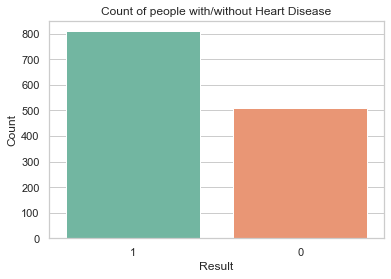

In [18]:
#Barplot
sns.set(style="whitegrid")
ax = sns.countplot(x = target, 
                data=df,
                palette='Set2',
                order = df['Result'].value_counts().index
                )
ax.set_ylabel('Count')
plt.title('Count of people with/without Heart Disease')

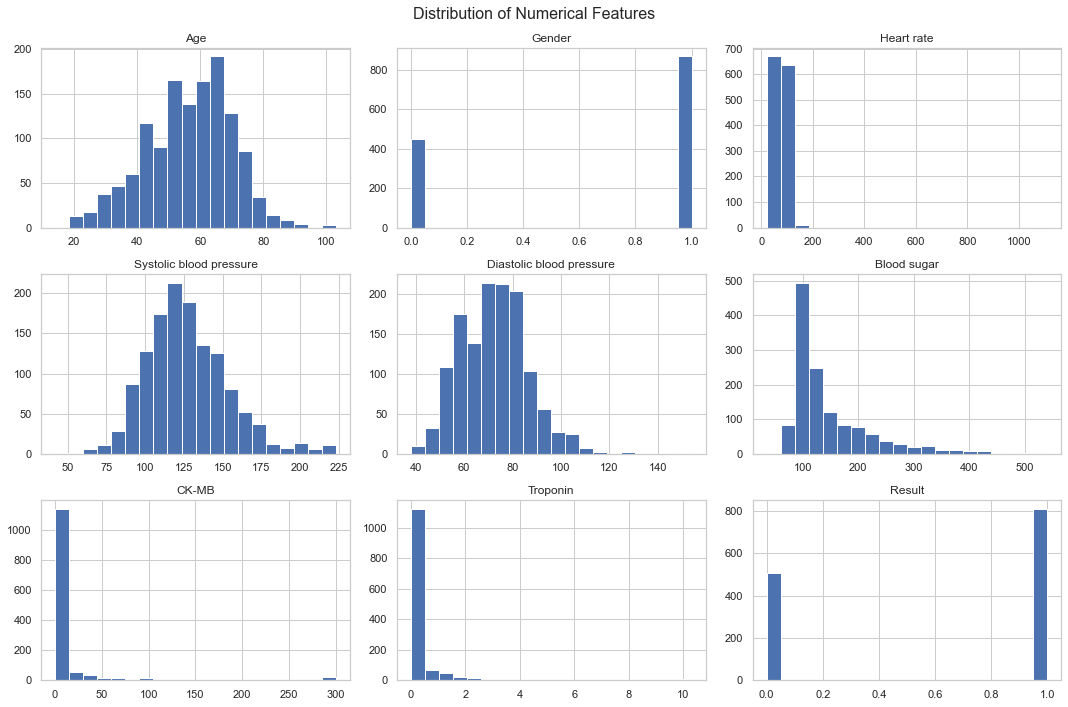

In [20]:
#Histogram
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

#Gender: 0-female, 1-male

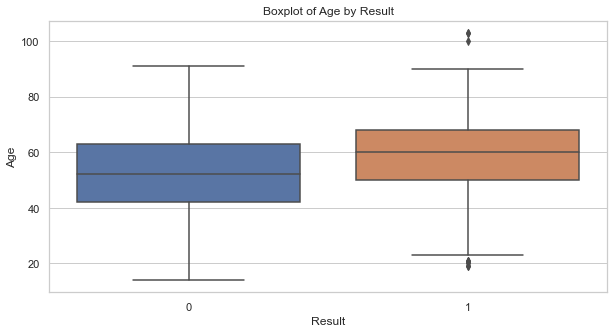

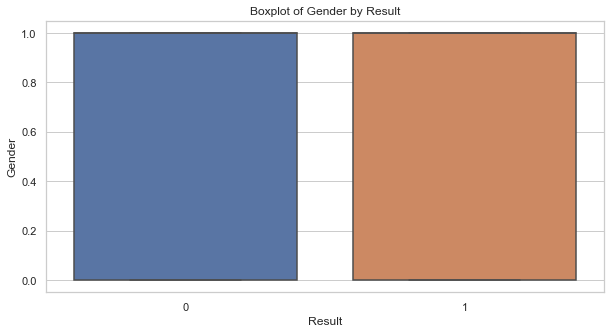

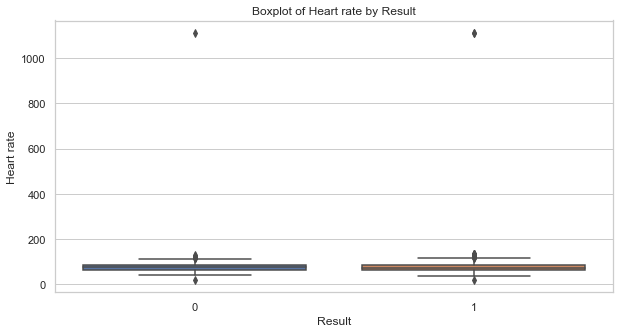

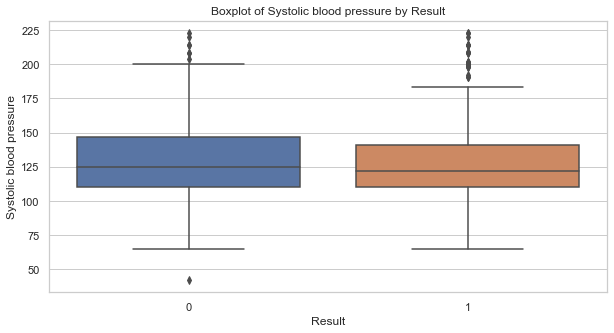

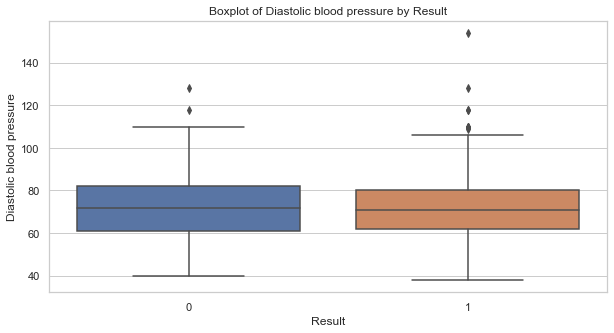

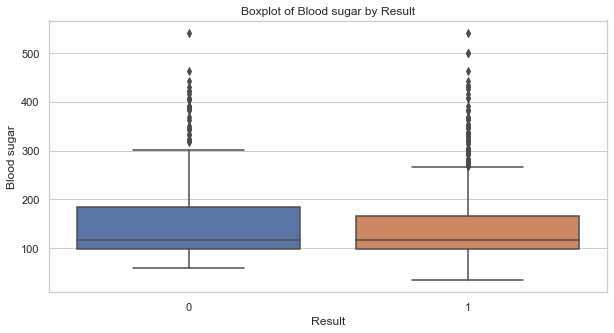

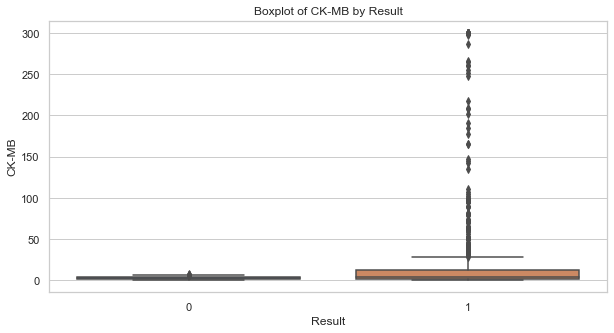

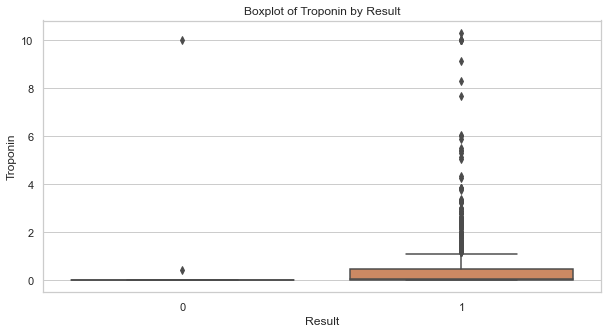

In [21]:
#Boxplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'Result'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target, y=col, data=df)
        plt.title(f'Boxplot of {col} by {target}')
        plt.show()

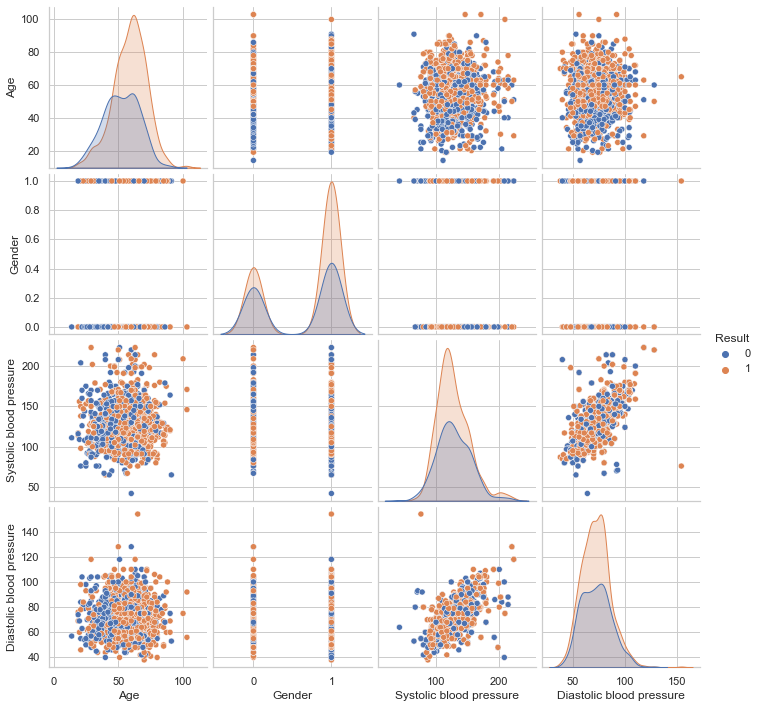

In [24]:
#Pairplot
sns.pairplot(df[['Age', 'Gender', 'Systolic blood pressure', 'Diastolic blood pressure', 'Result']], hue='Result')
plt.show()

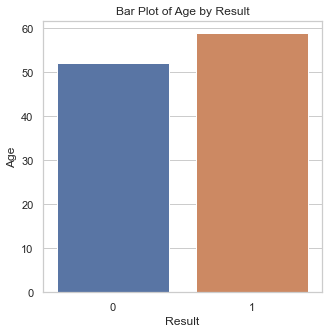

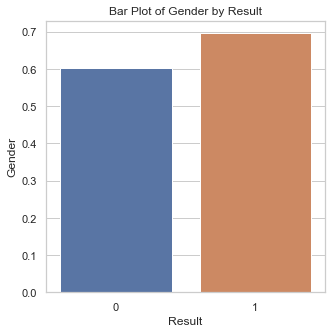

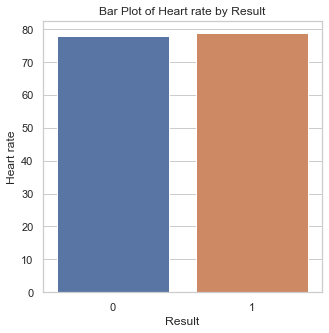

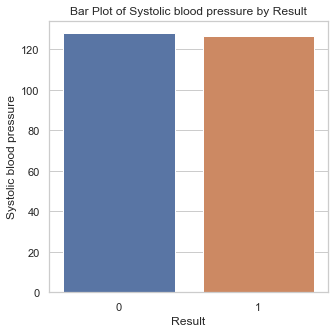

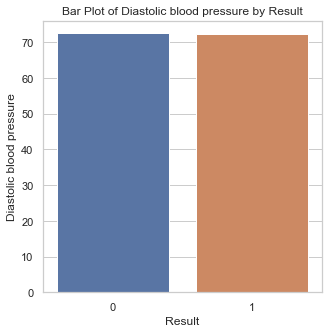

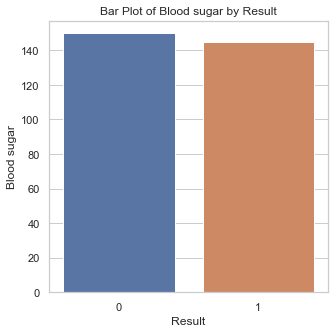

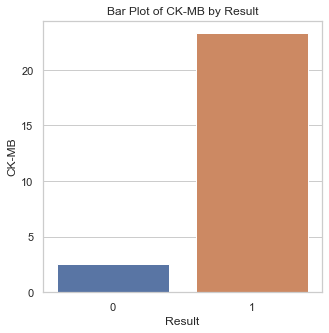

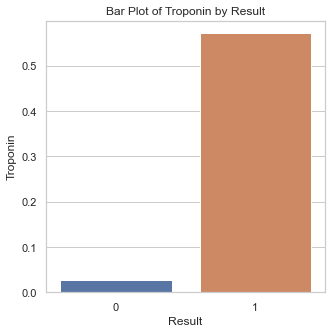

In [25]:
#Barplot
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
target = 'Result'

for col in numerical_columns:
    if col != target:
        plt.figure(figsize=(5, 5))
        sns.barplot(x=target, y=col, data=df, ci=None)
        plt.title(f'Bar Plot of {col} by {target}')
        plt.show()

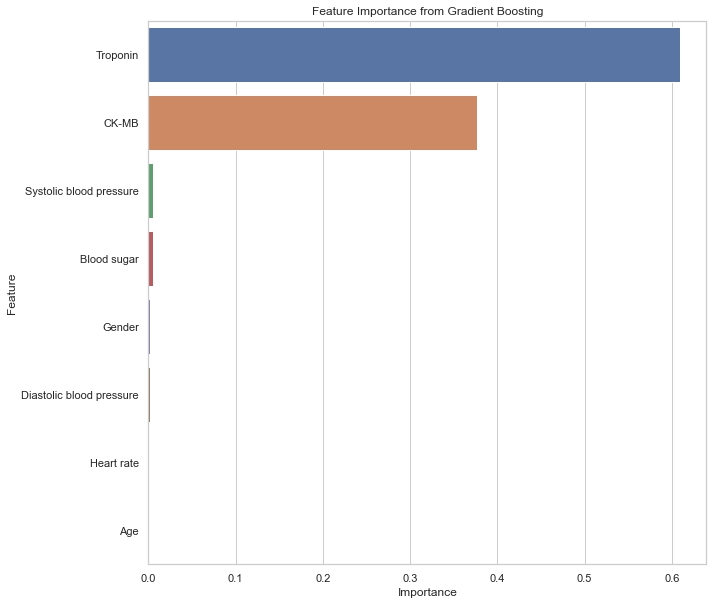

In [26]:
#Plot for Feature Importance
fea_imp = gb_clf.feature_importances_
fea = X.columns

imp_df = pd.DataFrame({'Feature': fea, 'Importance': fea_imp})
imp_df = imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 10))
sns.barplot(x='Importance', y='Feature', data=imp_df)
plt.title('Feature Importance from Gradient Boosting')
plt.show()

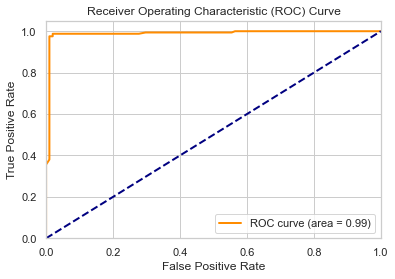

In [27]:
#ROC curve
from sklearn.metrics import roc_curve, auc

y_prob = gb_clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

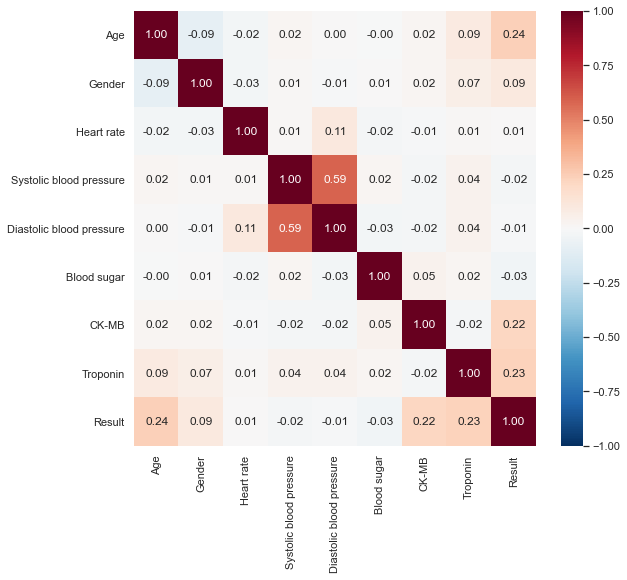

In [28]:
#Heatmap
import numpy as np

correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(9,8))

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, cmap='RdBu_r', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()